# Changing Topic to: CO2 Emissions over years and its impact on life/climates and showing current trends

## Project Title: Visualizing the Impact of CO2 Emissions on Communities and Climates

### Description:

#### Overview: 
This project aims to visualize the global CO2 emissions data to provide insights into trends, patterns, and impacts of human activities on climate change. Using interactive data visualization techniques, we aim to present a comprehensive view of CO2 emissions over time, segmented by country, industry, and other relevant factors.

#### Statement: 
Food deserts, areas with limited access to affordable, nutritious food, have a significant impact on the health and well-being of communities. This project aims to address the issue of food deserts by visually representing their extent and impact on various communities.

#### Solution:
Create a data visualization project that depicts the locations of food deserts, their boundaries, and the socio-economic and health-related consequences of living in these areas. The project should emphasize the importance of improving access to healthy food options in underserved communities.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
print(os.listdir("c:/Users/Tuan Tran/Documents/GitHub/CECS450-project/datasets")) # Change this path depend on where you saved your files

['annual-co-emissions-by-region.csv', 'annual-co2-emissions-per-country.csv', 'co-emissions-per-capita.csv', 'global-co2-fossil-plus-land-use.csv']


### File Path:

datasets/annual-co-emissions-by-region.csv

datasets/annual-co2-emissions-per-country.csv

datasets/co-emissions-per-capita.csv

datasets/global-co2-fossil-plus-land-use.csv

In [4]:
# read in the data\
annual_co2_per_country = pd.read_csv("c:/Users/Tuan Tran/Documents/GitHub/CECS450-project/datasets/annual-co2-emissions-per-country.csv", header=0)
annual_co2_per_country.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


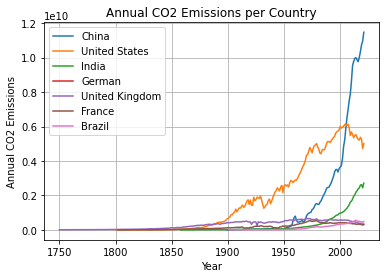

In [12]:
# format and graph
annual_co2_per_country = pd.DataFrame(annual_co2_per_country)

# choose a few specific countries
countries = ['China', 'United States', 'India', 'German', 'United Kingdom', 'France', 'Brazil']

# create a new dataframe with only the chosen countries
countries_data = annual_co2_per_country[annual_co2_per_country['Entity'].isin(countries)]

# group the data by country
for country in countries:
    country_data = countries_data[countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Annual CO₂ emissions'], label=country)

plt.title('Annual CO2 Emissions per Country')
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# read in the data
global_co2_fossil_land = pd.read_csv("c:/Users/Tuan Tran/Documents/GitHub/CECS450-project/datasets/global-co2-fossil-plus-land-use.csv", header=0)
global_co2_fossil_land.head()

,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions including land-use change,Annual CO₂ emissions from land-use change
0,Afghanistan,AFG,1850,NaN,NaN,2931200.0
1,Afghanistan,AFG,1851,NaN,NaN,2967840.0
2,Afghanistan,AFG,1852,NaN,NaN,2967840.0
3,Afghanistan,AFG,1853,NaN,NaN,3004480.0
4,Afghanistan,AFG,1854,NaN,NaN,3004480.0


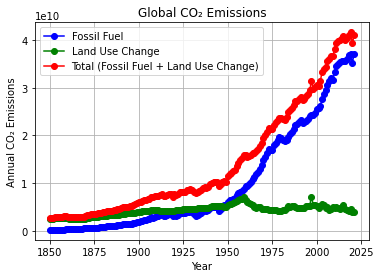

In [22]:
# Create a DataFrame from the data
global_co2_fossil_land = pd.DataFrame(global_co2_fossil_land)
world_data = global_co2_fossil_land[global_co2_fossil_land['Entity']=='World']

# Extract the Year and Annual CO₂ emissions from land-use change values
years = world_data['Year']
emissions_fossil_fuel = world_data['Annual CO₂ emissions including land-use change'] - world_data['Annual CO₂ emissions from land-use change']
emissions_land_use_change = world_data['Annual CO₂ emissions from land-use change']
emissions_total = world_data['Annual CO₂ emissions including land-use change']

# Create the line graph for global CO₂ emissions
plt.plot(years, emissions_fossil_fuel, marker='o', linestyle='-', color='b', label='Fossil Fuel')
plt.plot(years, emissions_land_use_change, marker='o', linestyle='-', color='g', label='Land Use Change')
plt.plot(years, emissions_total, marker='o', linestyle='-', color='r', label='Total (Fossil Fuel + Land Use Change)')
plt.title('Global CO₂ Emissions')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions')
plt.grid(True)
plt.legend()

plt.show()